<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Day_7_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean-Median Imputation

In [6]:
# We should use Mean-Median Imputation when:-
# 1> Data is MCAR (Missing Completely At Random)
# 2> When the missing values are less than 5%

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("/content/titanic_toy.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [12]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [18]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [20]:
X_train.sample(3)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
424,18.0,20.2125,2,18.00,18.000000,20.2125,20.2125
802,11.0,120.0000,3,11.00,11.000000,120.0000,120.0000
31,NaN,146.5208,1,28.75,29.785904,146.5208,146.5208


In [21]:
print("original Age variable variance: ",X_train['Age'].var())
print("Age Variance after mean imputation: ",X_train['Age_mean'].var())
print("Age Variance after median imputation: ",X_train['Age_median'].var())

print("original Fare variable variance: ",X_train['Fare'].var())
print("Fare Variance after mean imputation: ",X_train['Fare_mean'].var())
print("Fare Variance after median imputation: ",X_train['Fare_median'].var())

original Age variable variance:  204.3495133904614
Age Variance after mean imputation:  161.81262452718673
Age Variance after median imputation:  161.9895663346054
original Fare variable variance:  2448.197913706318
Fare Variance after mean imputation:  2324.2385256705547
Fare Variance after median imputation:  2340.0910219753637


`Variance is the measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value. `

`Here the Age has different in variance so we need to be careful while applying mean and median on NAN Values`

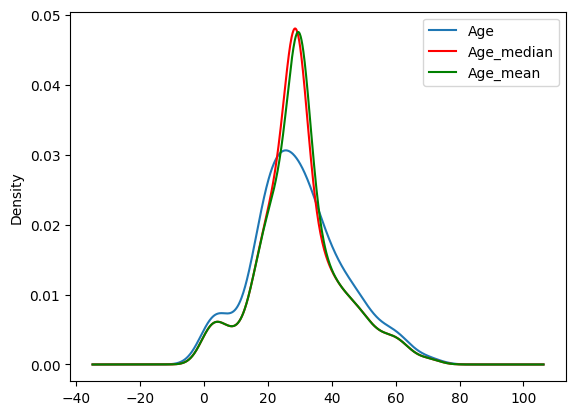

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Age'].plot(kind='kde',ax=ax)

# Variable imputed with the median
X_train['Age_median'].plot(kind='kde',ax=ax,color='red')

# Variable imputed with the mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

# add legends
lines, label = ax.get_legend_handles_labels()
ax.legend( lines, label, loc='best')

There is a drastic change . So this is a red Flag

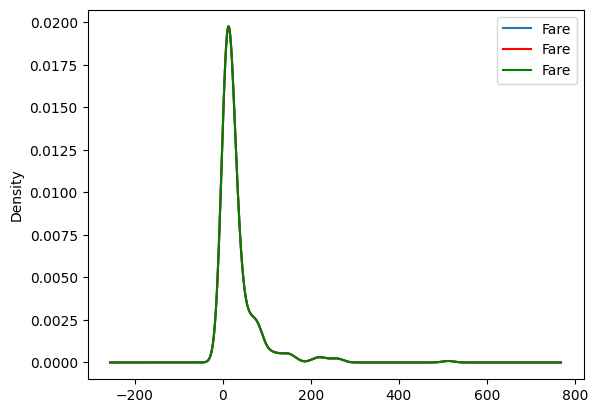

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Fare'].plot(kind='kde',ax=ax)

# Variable imputed with the median
X_train['Fare'].plot(kind='kde',ax=ax,color='red')

# Variable imputed with the mean
X_train['Fare'].plot(kind='kde',ax=ax,color='green')

# add legends
lines, label = ax.get_legend_handles_labels()
ax.legend( lines, label, loc='best')

The imputed value and original value is same so this is green flag

In [24]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [25]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

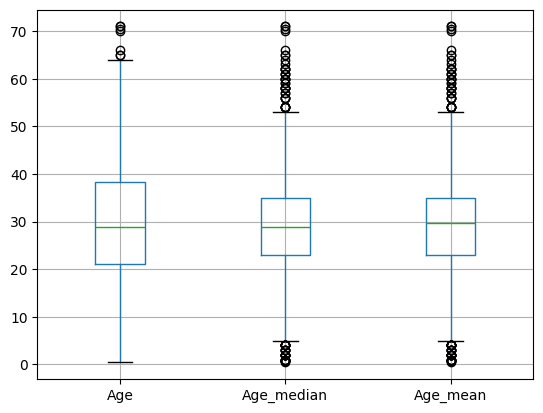

In [26]:
X_train[['Age','Age_median','Age_mean']].boxplot()

Here we can completely see that after imputing the median and mean value the outliars are increased. This is due to the Shrinking of the IQR. So Using mean and median in the Age Column is a big Red Flag

<Axes: >

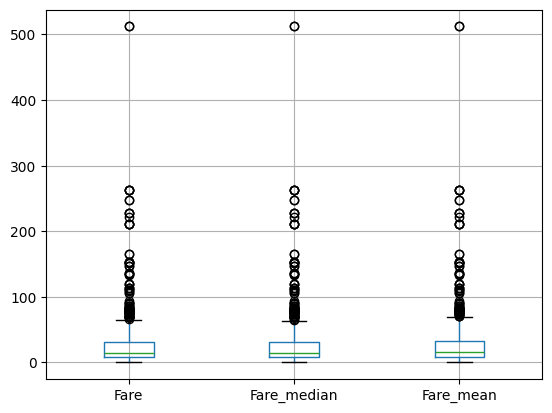

In [27]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

There is no much change in the Fare. So we can use mean and median in Fare as there is not much impact

# Using Sklearn

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

For using Arbitary values we can do is:
SimpleImputer(strategy='constant',fill_na=990)

In [32]:
 trf = ColumnTransformer([
    ('impute1',imputer1,['Age']),
    ('impute2',imputer2,['Fare'])
],remainder='passthrough')

In [33]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('impute1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('impute2', SimpleImputer(), ['Fare'])])

In [36]:
# <name>.named_transformers_['<name_trnas>'] --> Helps to get the data after the operation
trf.named_transformers_['impute1'].statistics_,trf.named_transformers_['impute2'].statistics_

(array([28.75]), array([32.61759689]))

We get the mean and median value from the above code of age and fare

In [37]:
X_train= trf.transform(X_train)
X_test = trf.transform(X_test)

In [38]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])